In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\Stuart_bm\Stuart_bmcite_RNAassay_original.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata = sc.read_h5ad(dataset_dir / 'Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata.shape

(30672, 17009)

In [3]:
adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508


In [4]:
# Level1
labels = adata.obs['celltype.l1'].tolist()
types = np.unique(labels).tolist()
types

['B cell', 'Mono/DC', 'NK', 'Progenitor cells', 'T cell']

## Read annotation result from CellAssign (Level: Main)

In [5]:
pred_l1 = pd.read_csv('CellAssign_pred_Stuart_L1_PreLect_v2.csv', index_col=0)
pred_l1.head()

,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T
a_AAACCTGAGCTTATCG-1,1.204379e-09,1.790603e-30,5.875222e-03,4.660311e-11,3.457828e-12,4.868818e-14,9.941248e-01,9.658643e-36
a_AAACCTGAGGTGGGTT-1,1.865657e-08,4.763744e-13,9.986445e-01,1.007608e-09,2.131384e-08,2.999366e-08,1.355460e-03,7.243817e-19
a_AAACCTGAGTACATGA-1,1.154260e-09,6.970434e-12,9.998756e-01,5.923388e-12,2.527955e-10,4.171109e-11,1.243648e-04,2.720217e-21
a_AAACCTGCAAACCTAC-1,1.112982e-21,1.107731e-14,1.000000e+00,6.989284e-24,2.068714e-23,1.004368e-23,1.598395e-15,1.670040e-40
a_AAACCTGCAAGGTGTG-1,1.756306e-83,3.616077e-98,7.293491e-81,5.135911e-83,1.000000e+00,3.663148e-85,1.176901e-77,1.399866e-104


In [6]:
# Assign prediction celltype by score
largest_values = []
largest_columns = []
assignments = []
for index, row in pred_l1.iterrows():
    # find largest value and their corresponding columns
    largest_value = row.max()
    largest_column = row.idxmax()
    largest_values.append(largest_value)
    largest_columns.append(largest_column)

    assign = largest_column
    assignments.append(assign)

# result_df = pd.DataFrame({'Largest Value': largest_values, 'Largest Column': largest_columns, 'Assignment': assignments})
# result_df.shape
pred_l1['Assignment'] = assignments
pred_l1.head()


,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T,Assignment
a_AAACCTGAGCTTATCG-1,1.204379e-09,1.790603e-30,5.875222e-03,4.660311e-11,3.457828e-12,4.868818e-14,9.941248e-01,9.658643e-36,other
a_AAACCTGAGGTGGGTT-1,1.865657e-08,4.763744e-13,9.986445e-01,1.007608e-09,2.131384e-08,2.999366e-08,1.355460e-03,7.243817e-19,CD8_T
a_AAACCTGAGTACATGA-1,1.154260e-09,6.970434e-12,9.998756e-01,5.923388e-12,2.527955e-10,4.171109e-11,1.243648e-04,2.720217e-21,CD8_T
a_AAACCTGCAAACCTAC-1,1.112982e-21,1.107731e-14,1.000000e+00,6.989284e-24,2.068714e-23,1.004368e-23,1.598395e-15,1.670040e-40,CD8_T
a_AAACCTGCAAGGTGTG-1,1.756306e-83,3.616077e-98,7.293491e-81,5.135911e-83,1.000000e+00,3.663148e-85,1.176901e-77,1.399866e-104,Mono


## Plot confusion matrix (un-converted)

In [10]:
true_labels = adata.obs['celltype.l1']
predicted_labels = pred_l1['Assignment']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['CellAssign predicted'], margins=False)
cm = cm.reindex(index=['B cell', 'T cell', 'Mono/DC', 'NK', 'Progenitor cells'])
cm

CellAssign predicted,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T
True,,,,,,,,
B cell,3695,0,19,12,8,2,17,0
T cell,15,7,14175,0,15,485,203,1
Mono/DC,6,0,1,638,7081,1,2,0
NK,0,0,32,0,12,1361,5,0
Progenitor cells,190,0,53,212,611,2,1811,0


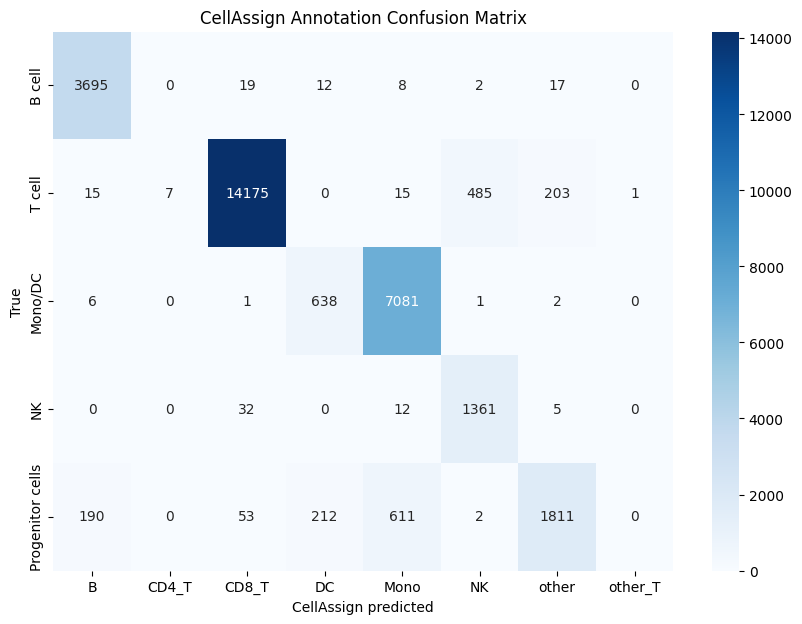

In [11]:
# Plot CM
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CellAssign Annotation Confusion Matrix')
plt.show()

## Plot confusion matrix 1 (Mapped to Stuart)

In [12]:
# Convert predicted labels
a = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']
b = ['B cell', 'T cell', 'T cell', 'Mono/DC', 'Mono/DC', 'NK', 'Progenitor cells', 'T cell']
type_reference = dict(zip(a, b))
type_reference


{'B': 'B cell',
 'CD4_T': 'T cell',
 'CD8_T': 'T cell',
 'DC': 'Mono/DC',
 'Mono': 'Mono/DC',
 'NK': 'NK',
 'other': 'Progenitor cells',
 'other_T': 'T cell'}

In [13]:
for cell in pred_l1.index:
    if pred_l1.loc[cell, 'Assignment'] in type_reference:
        pred_l1.loc[cell, 'Pred_converted'] = type_reference[pred_l1.loc[cell, 'Assignment']]
    else:
        pred_l1.loc[cell, 'Pred_converted'] = pred_l1.loc[cell, 'Assignment']
pred_l1.head()

,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T,Assignment,Pred_converted
a_AAACCTGAGCTTATCG-1,1.204379e-09,1.790603e-30,5.875222e-03,4.660311e-11,3.457828e-12,4.868818e-14,9.941248e-01,9.658643e-36,other,Progenitor cells
a_AAACCTGAGGTGGGTT-1,1.865657e-08,4.763744e-13,9.986445e-01,1.007608e-09,2.131384e-08,2.999366e-08,1.355460e-03,7.243817e-19,CD8_T,T cell
a_AAACCTGAGTACATGA-1,1.154260e-09,6.970434e-12,9.998756e-01,5.923388e-12,2.527955e-10,4.171109e-11,1.243648e-04,2.720217e-21,CD8_T,T cell
a_AAACCTGCAAACCTAC-1,1.112982e-21,1.107731e-14,1.000000e+00,6.989284e-24,2.068714e-23,1.004368e-23,1.598395e-15,1.670040e-40,CD8_T,T cell
a_AAACCTGCAAGGTGTG-1,1.756306e-83,3.616077e-98,7.293491e-81,5.135911e-83,1.000000e+00,3.663148e-85,1.176901e-77,1.399866e-104,Mono,Mono/DC


In [14]:
# Confusion matrix
true_labels = adata.obs['celltype.l1']
predicted_labels = pred_l1['Pred_converted']

cm_Stuart = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['CellAssign predicted'], margins=False)
cm_Stuart

CellAssign predicted,B cell,Mono/DC,NK,Progenitor cells,T cell
True,,,,,
B cell,3695,20,2,17,19
Mono/DC,6,7719,1,2,1
NK,0,12,1361,5,32
Progenitor cells,190,823,2,1811,53
T cell,15,15,485,203,14183


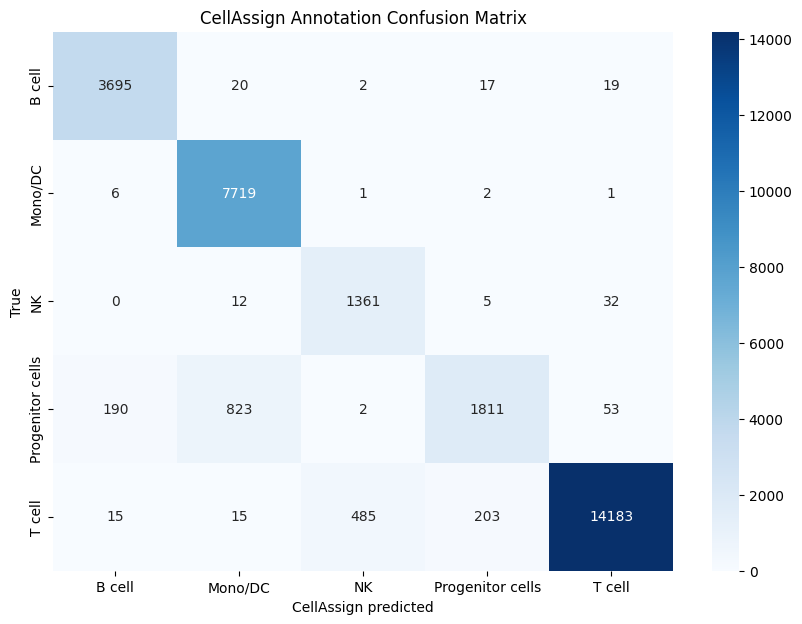

In [15]:
# Plot CM2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.heatmap(cm_Stuart, annot=True, fmt='d', cmap='Blues')
plt.title('CellAssign Annotation Confusion Matrix')
plt.show()

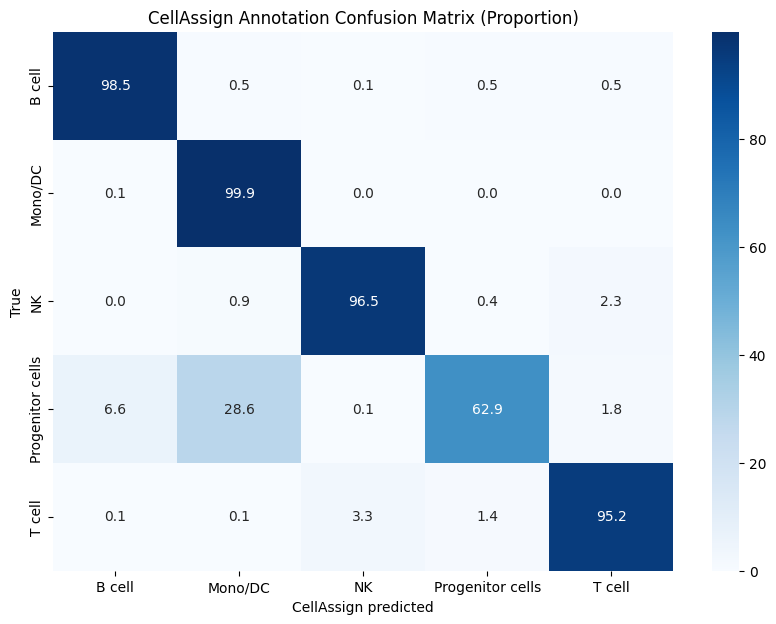

In [16]:
row_sum = cm_Stuart.sum(axis=1)
cm_Stuart_proportion = cm_Stuart.div(row_sum, axis=0) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(cm_Stuart_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('CellAssign Annotation Confusion Matrix (Proportion)')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

print(np.unique(predicted_labels))
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

method = ['micro', 'macro', 'weighted']
for m in method:
    precision = precision_score(true_labels, predicted_labels, average=m)
    print(f"{m} Precision:", precision)
    f1 = f1_score(true_labels, predicted_labels, average=m)
    print(f"{m} F1 Score:", f1)

['B cell' 'Mono/DC' 'NK' 'Progenitor cells' 'T cell']
Accuracy: 0.9379564423578508
micro Precision: 0.9379564423578508
micro F1 Score: 0.9379564423578508
macro Precision: 0.8922467772702479
macro F1 Score: 0.8908190988323552
weighted Precision: 0.9416712366676456
weighted F1 Score: 0.9360958471919233


## Plot confusion matrix 2 (Mapped to Hao)

In [19]:
adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508


In [18]:
pred_l1.head()

,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T,Assignment,Pred_converted
a_AAACCTGAGCTTATCG-1,1.204379e-09,1.790603e-30,5.875222e-03,4.660311e-11,3.457828e-12,4.868818e-14,9.941248e-01,9.658643e-36,other,Progenitor cells
a_AAACCTGAGGTGGGTT-1,1.865657e-08,4.763744e-13,9.986445e-01,1.007608e-09,2.131384e-08,2.999366e-08,1.355460e-03,7.243817e-19,CD8_T,T cell
a_AAACCTGAGTACATGA-1,1.154260e-09,6.970434e-12,9.998756e-01,5.923388e-12,2.527955e-10,4.171109e-11,1.243648e-04,2.720217e-21,CD8_T,T cell
a_AAACCTGCAAACCTAC-1,1.112982e-21,1.107731e-14,1.000000e+00,6.989284e-24,2.068714e-23,1.004368e-23,1.598395e-15,1.670040e-40,CD8_T,T cell
a_AAACCTGCAAGGTGTG-1,1.756306e-83,3.616077e-98,7.293491e-81,5.135911e-83,1.000000e+00,3.663148e-85,1.176901e-77,1.399866e-104,Mono,Mono/DC


In [20]:
# BMcite true L2 labels
bm_l2_to_converted_A = {
'Naive B': 'B',
'Memory B': 'B',
'CD4 Naive': 'CD4_T',
'CD4 Memory': 'CD4_T', # 'CD4_TEM', 'CD4_TCM',
'CD8 Naive': 'CD8_T',
'CD8 Effector_1': 'CD8_T',
'CD8 Effector_2': 'CD8_T',
'CD8 Memory_1': 'CD8_T',
'CD8 Memory_2': 'CD8_T',
'gdT': 'other_T',
'Treg': 'other_T',
'MAIT': 'other_T',
'cDC2': 'DC',
'pDC': 'DC',
'CD14 Mono': 'Mono',
'CD16 Mono': 'Mono',
'NK': 'NK',
'CD56 bright NK': 'NK',
'Plasmablast': 'other',
'HSC': 'other',  # (Hematopeitic stem and progenitor cell)
'GMP': 'other',  # (granulocyte macrophage progenitor)
'LMPP': 'other', # (Lympho-myeloid primed progenitor)
'Prog_RBC': 'other',
'Prog_B 1': 'other',
'Prog_B 2': 'other',
'Prog_DC': 'other',
'Prog_Mk': 'other'  # (megakaryocyte)
}

for cell in adata.obs_names:
    # Convert true L2 bmcite labels
    if adata.obs.loc[cell, 'celltype.l2'] in bm_l2_to_converted_A:
        adata.obs.loc[cell, 'true_L2_converted_A'] = bm_l2_to_converted_A[adata.obs.loc[cell, 'celltype.l2']]
    else:
        pass

adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight,true_L2_converted_A
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701,other
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789,other_T
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714,CD4_T
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308,CD4_T
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508,Mono


In [22]:
true_labels = adata.obs['true_L2_converted_A']
predicted_labels = pred_l1['Assignment']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['PreLect LR model predicted'], margins=False)
# row_order = cm.index.tolist()
# row_order.append(row_order.pop(row_order.index('Progenitor cells')))
# cm = cm.reindex(row_order, axis=0)
cm

PreLect LR model predicted,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T
True,,,,,,,,
B,3489,0,17,9,6,2,7,0
CD4_T,8,4,7680,0,3,1,164,0
CD8_T,7,0,5548,0,11,257,34,0
DC,2,0,1,635,169,1,2,0
Mono,4,0,0,3,6912,0,0,0
NK,0,0,32,0,12,1361,5,0
other,396,0,55,215,613,2,1821,0
other_T,0,3,947,0,1,227,5,1


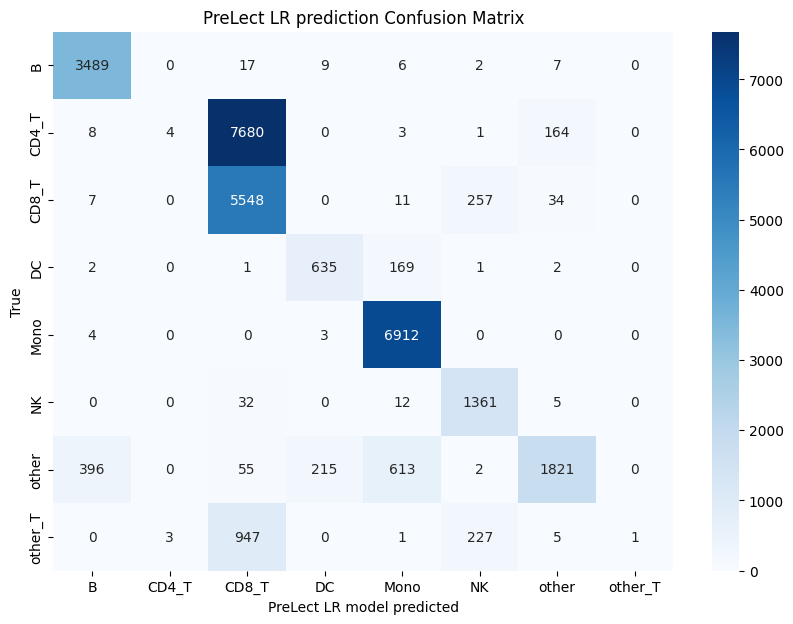

In [23]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('PreLect LR prediction Confusion Matrix')
plt.show()

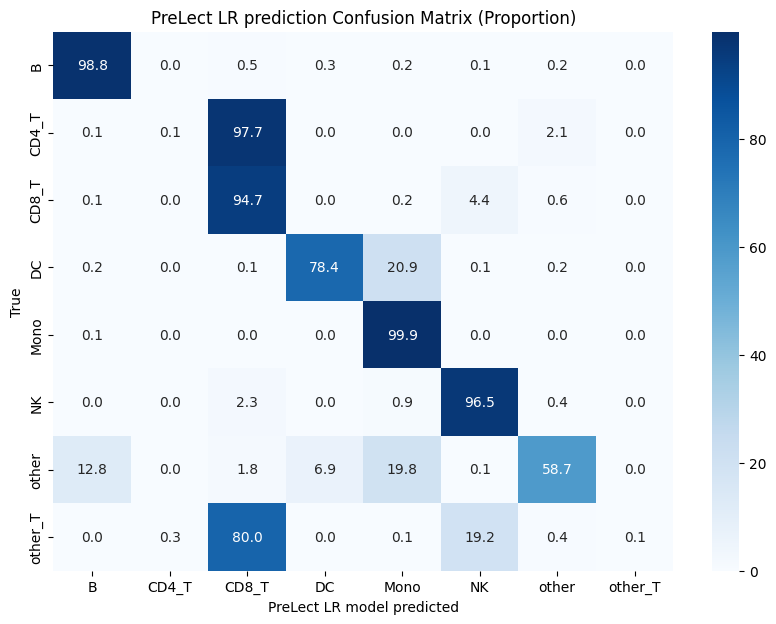

In [24]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('PreLect LR prediction Confusion Matrix (Proportion)')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

method = ['micro', 'macro', 'weighted']
for m in method:
    precision = precision_score(true_labels, predicted_labels, average=m)
    print(f"{m} Precision:", precision)
    f1 = f1_score(true_labels, predicted_labels, average=m)
    print(f"{m} F1 Score:", f1)

Accuracy: 0.644594418362024
micro Precision: 0.644594418362024
micro F1 Score: 0.644594418362024
macro Precision: 0.7641463820865664
macro F1 Score: 0.5923570399570023
weighted Precision: 0.707435851730556
weighted F1 Score: 0.5565581659279176
